In [1]:
import os
import matplotlib.pyplot as plt
with open('./eval.txt', 'r') as f:
    content = f.readlines()
print(content[-10:])

['Epoch: 95\tavg. loss: 0.6578634353354573\n', 'Avg. MSE: 1.905436988636211e-06\tAvg. MAE: 0.0012098205043002963\n', 'Epoch: 95\tcurrent score: 0.0012098205043002963\tbest score: 0.0012425243621692061\n', 'Epoch: 96\tavg. loss: 0.6578516364097595\n', 'Epoch: 97\tavg. loss: 0.6189714564010501\n', 'Epoch: 98\tavg. loss: 0.6097217570990324\n', 'Epoch: 99\tavg. loss: 0.6097064150497318\n', 'Avg. MSE: 1.7629305375521653e-06\tAvg. MAE: 0.0011688482481986284\n', 'Epoch: 99\tcurrent score: 0.0011688482481986284\tbest score: 0.0012098205043002963\n', 'Elapsed time: 22:30:35.631847\n']


In [2]:
losses = []
maes = []
mses = []
for line in content:
    value = line.replace('\n', '').split(' ')[-1]
    try:
        value = float(value)
    except:
        value = 0
    if 'loss' in line and value < 1000: # Don't add 'infinite' loss to history
        losses.append(value)
    if 'MSE' in line:
        for _ in range(5): # Repeat the values to get results for 100 epochs
            mses.append(value)
    if 'MAE' in line:
        for _ in range(5): # Repeat the values to get results for 100 epochs
            maes.append(value)

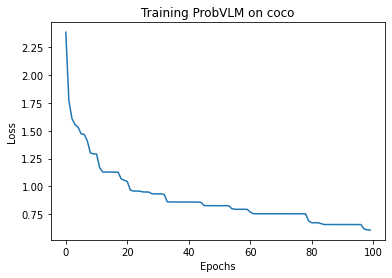

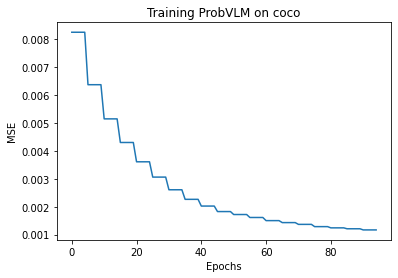

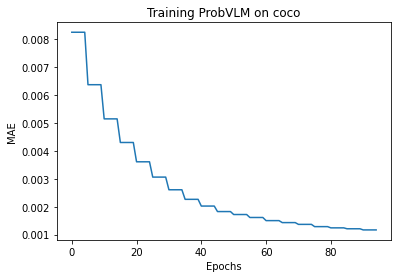

In [3]:
def plot_values(values, value_name):
    plt.plot(values)
    plt.xlabel('Epochs')
    plt.ylabel(value_name)
    plt.title('Training ProbVLM on coco')
    os.makedirs('results', exist_ok = True)
    plt.savefig(f'./results/probvlm_coco_{value_name.lower()}.png', transparent = True, bbox_inches='tight')
    plt.show()
plot_values(losses, 'Loss')
plot_values(mses, 'MSE')
plot_values(maes, 'MAE')